In [221]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style("whitegrid")
pd.options.display.float_format = '{:.2f}'.format


## 1. Data Loading and Inspection

In [222]:
data = pd.read_csv("../data/bank_data_C.csv")

print(f"The data has {len(data):,} rows")
data.head()

The data has 1,041,614 rows


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [224]:
data.describe(include= "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1041614.00,1041614,1041614.00,1041614.00
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,114998.61,NaN,157122.12,1566.10
std,NaN,NaN,NaN,NaN,NaN,846760.94,NaN,51263.52,6561.46
min,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00
25%,NaN,NaN,NaN,NaN,NaN,4728.14,NaN,124041.00,160.00
50%,NaN,NaN,NaN,NaN,NaN,16768.52,NaN,164247.00,457.50
75%,NaN,NaN,NaN,NaN,NaN,57428.85,NaN,200022.00,1200.00


## 2. Data Cleaning 

In [225]:
data.isna().sum() # Quick check for missing values

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [226]:
data.duplicated().sum() #Quick check for duplicate values.

0

#### 2.1 Work on the dates

In [227]:
# Looking at the dates we notice they are not in the right format. 
# Will work on the dates to have right format and extract the complete year(10-1-1994 instead of 10/1/94 as shown in the data)


def parse_dmy_with_rule(x):
    """
    Parse day-first dates with explicit 2-digit year rule:
      00–25 -> 2000+year, 26–99 -> 1900+year.
    Accepts separators '/', '-', '.', or space.
    Returns pandas.Timestamp or NaT.
    """
    if pd.isna(x) or str(x).strip() == "":
        return pd.NaT

    s = str(x).strip()

    # Try to split on a known separator
    for sep in ["/", "-", ".", " "]:
        if sep in s:
            parts = s.split(sep)
            break
    else:
        # Last resort: let pandas try, but keep dayfirst
        try:
            return pd.to_datetime(s, dayfirst=True, errors="coerce")
        except Exception:
            return pd.NaT

    if len(parts) != 3:
        return pd.NaT

    d, m, y = parts
    try:
        d, m = int(d), int(m)
        y = int(y)
    except ValueError:
        return pd.NaT

    # Expand 2-digit years using the explicit rule
    if len(str(y)) == 2:
        y = 2000 + y if 0 <= y <= 25 else 1900 + y if 26 <= y <= 99 else y

    # Validate and return Timestamp
    try:
        return pd.Timestamp(year=y, month=m, day=d)
    except Exception:
        return pd.NaT

# Apply to your columns
for col in ["CustomerDOB", "TransactionDate"]:
    data[col] = data[col].map(parse_dmy_with_rule)



data[["CustomerDOB", "TransactionDate"]].head()


,CustomerDOB,TransactionDate
0,1994-01-10 00:00:00,2016-08-02
1,1957-04-04 00:00:00,2016-08-02
2,1996-11-26 00:00:00,2016-08-02
3,1973-09-14 00:00:00,2016-08-02
4,1988-03-24 00:00:00,2016-08-02


In [228]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10 00:00:00,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00
1,T2,C2142763,1957-04-04 00:00:00,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00
2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-08-02,142712,459.00
3,T4,C5342380,1973-09-14 00:00:00,F,MUMBAI,866503.21,2016-08-02,142714,2060.00
4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041345 non-null  object        
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [230]:
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], dayfirst=True, errors="coerce") # To convert to datetime
data["CustomerDOB"]     = pd.to_datetime(data["CustomerDOB"],     dayfirst=True, errors="coerce")


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1040831 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [232]:
data[["CustomerDOB", "TransactionDate"]].head()


,CustomerDOB,TransactionDate
0,1994-01-10,2016-08-02
1,1957-04-04,2016-08-02
2,1996-11-26,2016-08-02
3,1973-09-14,2016-08-02
4,1988-03-24,2016-08-02


In [233]:
data.isna().sum() # To check for null values after converting to datetime.

TransactionID                0
CustomerID                   0
CustomerDOB                783
CustGender                   0
CustLocation                 0
CustAccountBalance           0
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [234]:
data.dropna(inplace =True) # drop the null values.

In [235]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [236]:
# Parsed the time -This code combines each transaction’s date and time into a single TransactionDateTime 
# column (in proper datetime format) so you can accurately analyze time-based patterns like hourly or daily trends.

tt = data["TransactionTime"].astype(str).str.zfill(6)  # Pad to HHMMSS

data["TransactionDateTime"] = pd.to_datetime(
    data["TransactionDate"].dt.strftime("%Y-%m-%d") + " " + tt,
    format="%Y-%m-%d %H%M%S",
    errors="coerce"
)

print(f"Datetime nulls: {data['TransactionDateTime'].isna().sum()}")
data[["TransactionDate", "TransactionTime", "TransactionDateTime"]].head()



Datetime nulls: 0


,TransactionDate,TransactionTime,TransactionDateTime
0,2016-08-02,143207,2016-08-02 14:32:07
1,2016-08-02,141858,2016-08-02 14:18:58
2,2016-08-02,142712,2016-08-02 14:27:12
3,2016-08-02,142714,2016-08-02 14:27:14
4,2016-08-02,181156,2016-08-02 18:11:56


In [237]:
data.duplicated().sum()

0

#### 2.2 Create customerAge Column and Renaming TransactionAmount (INR) Column

In [238]:
import pandas as pd
from datetime import datetime

#  Define a reference date (e.g., today or a fixed snapshot date)
today = pd.Timestamp(datetime.today().date())

# Compute age in years
data["CustomerAge"] = (today - data["CustomerDOB"]).dt.days // 365

#  Replace unrealistic ages (e.g., <0 or >120) with NaN
data.loc[(data["CustomerAge"] < 0) | (data["CustomerAge"] > 120), "CustomerAge"] = pd.NA

# Preview
print(data[["CustomerDOB", "CustomerAge"]].head())


  CustomerDOB  CustomerAge
0  1994-01-10        31.00
1  1957-04-04        68.00
2  1996-11-26        28.00
3  1973-09-14        52.00
4  1988-03-24        37.00


In [239]:
(data["CustomerAge"] >=110)

0          False
1          False
2          False
3          False
4          False
           ...  
1041609    False
1041610    False
1041611    False
1041612    False
1041613    False
Name: CustomerAge, Length: 1040831, dtype: bool

In [240]:
invalid_ages = data[(data["CustomerAge"] < 0) | (data["CustomerAge"] > 110)]
invalid_ages


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime,CustomerAge


In [241]:
invalid_count = invalid_ages.shape[0]
print(f"Number of invalid ages: {invalid_count}")


Number of invalid ages: 0


In [242]:
data.isna().sum()

TransactionID                  0
CustomerID                     0
CustomerDOB                    0
CustGender                     0
CustLocation                   0
CustAccountBalance             0
TransactionDate                0
TransactionTime                0
TransactionAmount (INR)        0
TransactionDateTime            0
CustomerAge                56292
dtype: int64

In [243]:
data.dropna(inplace =True) # drop the null values.

In [244]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionDateTime        0
CustomerAge                0
dtype: int64

In [245]:
data = data.rename(columns={"TransactionAmount (INR)": "TransactionAmount"})
list(data.columns)


['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'CustAccountBalance',
 'TransactionDate',
 'TransactionTime',
 'TransactionAmount',
 'TransactionDateTime',
 'CustomerAge']

In [246]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount', 'TransactionDateTime',
       'CustomerAge'],
      dtype='object')

## 3. Exploratory Data Analysis (EDA)

In [247]:
# IQR-based capping before analysis
da= data.copy()
for col in ["TransactionAmount", "CustAccountBalance"]:
    if col in da.columns:
        q1 = da[col].quantile(0.25)
        q3 = da[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        da[col] = da[col].clip(lower=lower, upper=upper)


#### 3.1 Univariate distributions (numeric)
- 

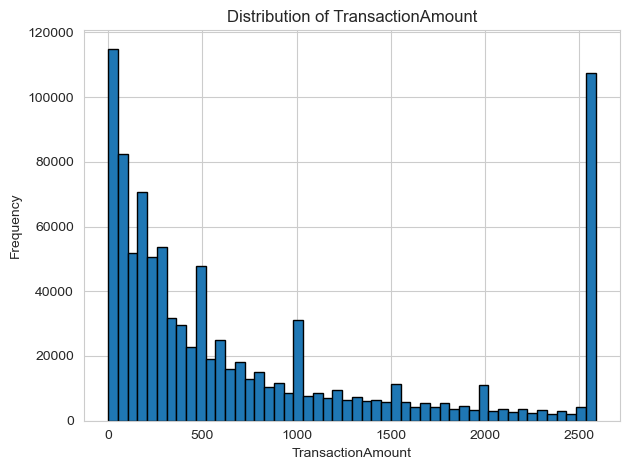

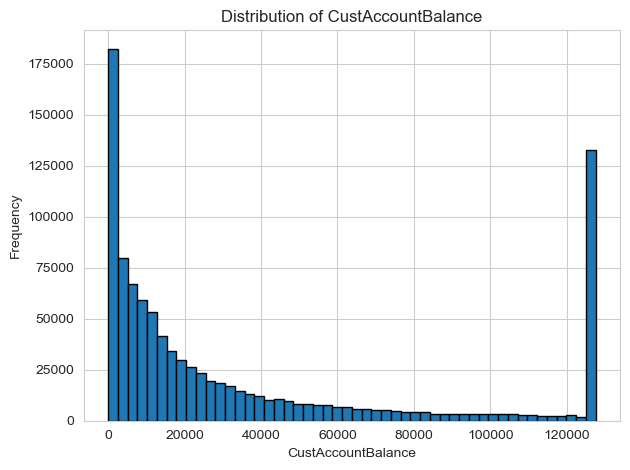

In [248]:
import matplotlib.pyplot as plt

num_cols = [c for c in ["TransactionAmount", "CustAccountBalance"] if c in da.columns]
for col in num_cols:
    plt.figure()
    da[col].dropna().plot(kind="hist", bins=50, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()  # or plt.savefig(f"hist_{col}.png"); plt.close()


#### 3.2 Univariate distributions (categorical)


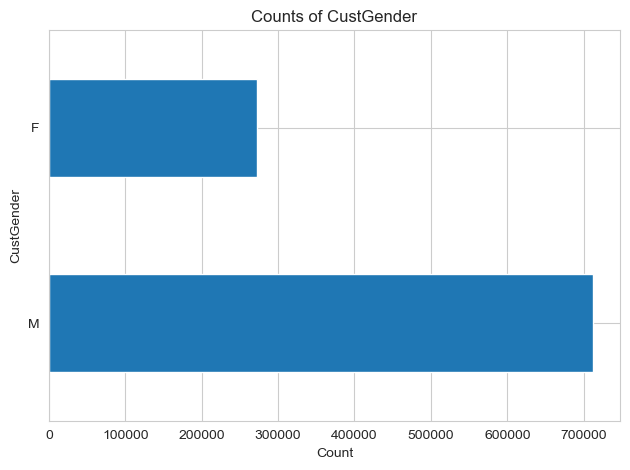

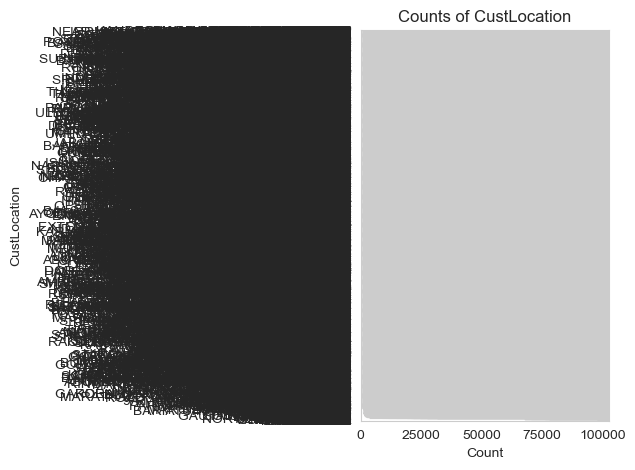

In [249]:
cat_cols = [c for c in ["CustGender", "CustLocation"] if c in da.columns]
for col in cat_cols:
    vc = da[col].value_counts(dropna=False)
    plt.figure()
    vc.plot(kind="barh")
    plt.title(f"Counts of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


#### 3.3 Monthly Transactions/Amount

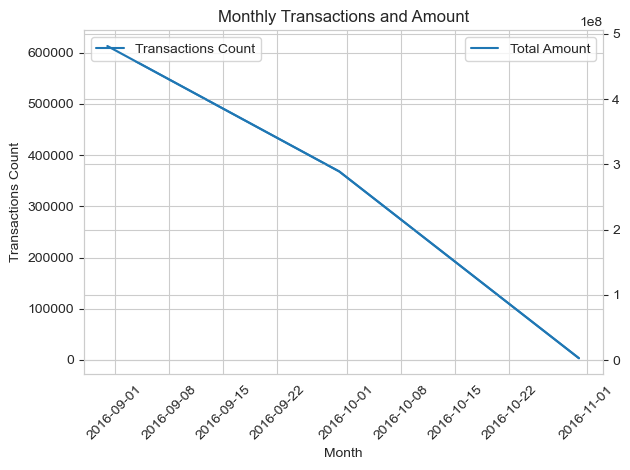

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

if "TransactionDate" in da.columns:
    da["TransactionDate"] = pd.to_datetime(da["TransactionDate"], errors="coerce")
    monthly = (
        da.dropna(subset=["TransactionDate"])
           .set_index("TransactionDate")
           .resample("ME")
           .agg(TxnCount=("TransactionAmount", "count"),
                TotalAmt=("TransactionAmount", "sum"))
    )

    fig, ax1 = plt.subplots()
    ax1.plot(monthly.index, monthly["TxnCount"], label="Transactions Count")
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Transactions Count")
    ax1.tick_params(axis="x", rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(monthly.index, monthly["TotalAmt"], label="Total Amount")

    # two legends: one for each axis
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.title("Monthly Transactions and Amount")
    plt.tight_layout()
    plt.show()


#### 3.4 customer-level summaries

In [251]:
# Build freq either from TransactionID if available, else row count
if "TransactionID" in da.columns:
    freq = da.groupby("CustomerID")["TransactionID"].nunique().rename("num_transactions")
else:
    freq = da.groupby("CustomerID").size().rename("num_transactions")

# Monetary + avg
monetary = da.groupby("CustomerID")["TransactionAmount"].sum().rename("total_amount")
avg_amt  = da.groupby("CustomerID")["TransactionAmount"].mean().rename("avg_amount")

# Last transaction date if present
if "TransactionDate" in da.columns:
    last_tx = da.groupby("CustomerID")["TransactionDate"].max().rename("last_tx_date")
    customer_tx = pd.concat([freq, monetary, avg_amt, last_tx], axis=1)
else:
    customer_tx = pd.concat([freq, monetary, avg_amt], axis=1)

customer_tx = customer_tx.sort_values("total_amount", ascending=False)
print(customer_tx.head(10))


            num_transactions  total_amount  avg_amount last_tx_date
CustomerID                                                         
C8842619                   4       9183.00     2295.75   2016-09-03
C4932056                   4       9058.00     2264.50   2016-09-07
C3226689                   6       8879.00     1479.83   2016-09-30
C4421676                   4       8865.00     2216.25   2016-09-06
C5317143                   5       8696.00     1739.20   2016-09-04
C2618678                   5       8691.60     1738.32   2016-09-22
C7924633                   4       8382.92     2095.73   2016-09-27
C6940291                   4       8371.00     2092.75   2016-09-12
C4123525                   5       8352.00     1670.40   2016-09-15
C7823376                   5       8185.70     1637.14   2016-09-07


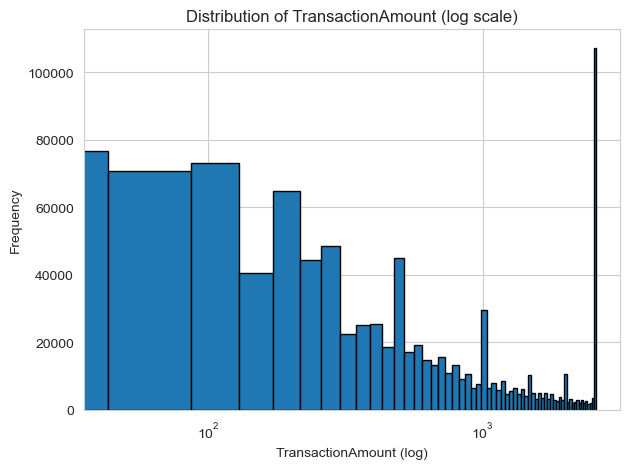

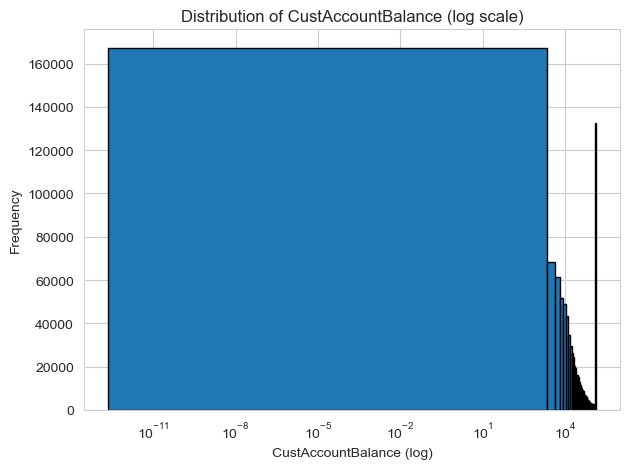

In [252]:
for col in num_cols:
    plt.figure()
    da[col].dropna().plot(kind="hist", bins=60, edgecolor="black")
    plt.xscale("log")
    plt.title(f"Distribution of {col} (log scale)")
    plt.xlabel(f"{col} (log)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


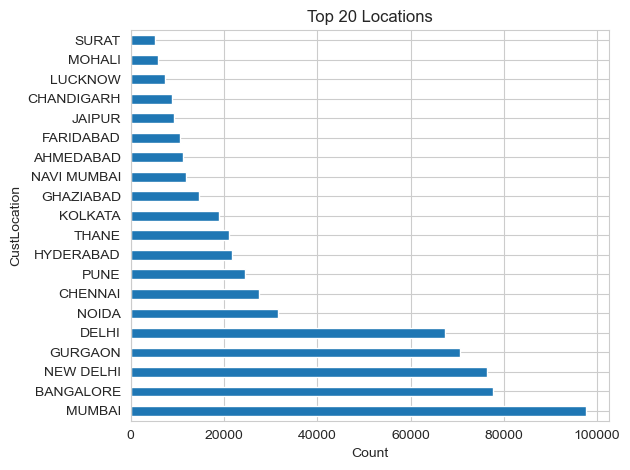

In [253]:
if "CustLocation" in da.columns:
    topk = 20
    vc = da["CustLocation"].value_counts().head(topk)
    plt.figure()
    vc.plot(kind="barh")
    plt.title(f"Top {topk} Locations")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()


In [254]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,TransactionDateTime,CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,2016-08-02 14:32:07,31.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,2016-08-02 14:18:58,68.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.00,2016-08-02 14:27:12,28.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,2016-08-02 14:27:14,52.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,2016-08-02 18:11:56,37.00


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984539 entries, 0 to 1041613
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TransactionID        984539 non-null  object        
 1   CustomerID           984539 non-null  object        
 2   CustomerDOB          984539 non-null  datetime64[ns]
 3   CustGender           984539 non-null  object        
 4   CustLocation         984539 non-null  object        
 5   CustAccountBalance   984539 non-null  float64       
 6   TransactionDate      984539 non-null  datetime64[ns]
 7   TransactionTime      984539 non-null  int64         
 8   TransactionAmount    984539 non-null  float64       
 9   TransactionDateTime  984539 non-null  datetime64[ns]
 10  CustomerAge          984539 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 90.1+ MB


In [256]:
# Save cleaned dataset to CSV (without the index column)
#data.to_csv("cleaned_bank_data.csv", index=False)

